In [51]:
%reset -f

# Part 1: Initial Setup and Parsing the LAS File


In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Path to your LAS file
file_path = './422393367200_WRA-1009_CXD_SEMB.las'

# Lists to hold the depth and log data (multiple logs)
depths = []
log_data = []

# Reading the LAS file manually
data_section = False  # To identify the start of the data section

with open(file_path, 'r') as las_file:
    for line in las_file:
        line = line.strip()  # Remove any leading/trailing whitespace

        # Look for the start of the data section (~A is the standard in LAS files)
        if line.startswith("~A"):
            data_section = True
            continue  # Skip the "~A" line itself

        # If we're in the data section, process the data
        if data_section:
            # Split the data line into components (assuming space-separated values)
            parts = line.split()
            if len(parts) >= 2:  # Ensure there are enough columns
                try:
                    # Convert the first column to depth and the rest to log data
                    depth = float(parts[0])
                    logs = [float(value) for value in parts[1:]]  # Store remaining columns as logs
                    # Only add valid data (exclude -9999 values)
                    if depth != -9999 and all(val != -9999 for val in logs):
                        depths.append(depth)
                        log_data.append(logs)
                except ValueError:
                    # Handle any lines that don't contain valid data
                    continue

# Convert to numpy arrays
depths = np.array(depths, dtype="float32")

# Convert depth from feet to meters (1 foot = 0.3048 meters)
depths = depths * 0.3048

log_data = np.array(log_data, dtype="float32")




In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define the formation tops in meters
formations = [
    {"name": "Greta", "top": 5084.82 * 0.3048},
    {"name": "Greta Base", "top": 5239.32 * 0.3048},
    {"name": "Glasscock", "top": 5465.68 * 0.3048},
    {"name": "Glasscock Base", "top": 5521.79 * 0.3048},
    {"name": "Ward", "top": 5646.74 * 0.3048},
    {"name": "Ward Base", "top": 5694.34 * 0.3048},
    {"name": "41 - A", "top": 5711.09 * 0.3048},
    {"name": "41 - A Base", "top": 5809.12 * 0.3048},
    {"name": "98 - A", "top": 6140.09 * 0.3048},
    {"name": "98 - A Base", "top": 6270.3 * 0.3048}
]

# Part 2: Visualizing All Log Data

## Density Log

No handles with labels found to put in legend.


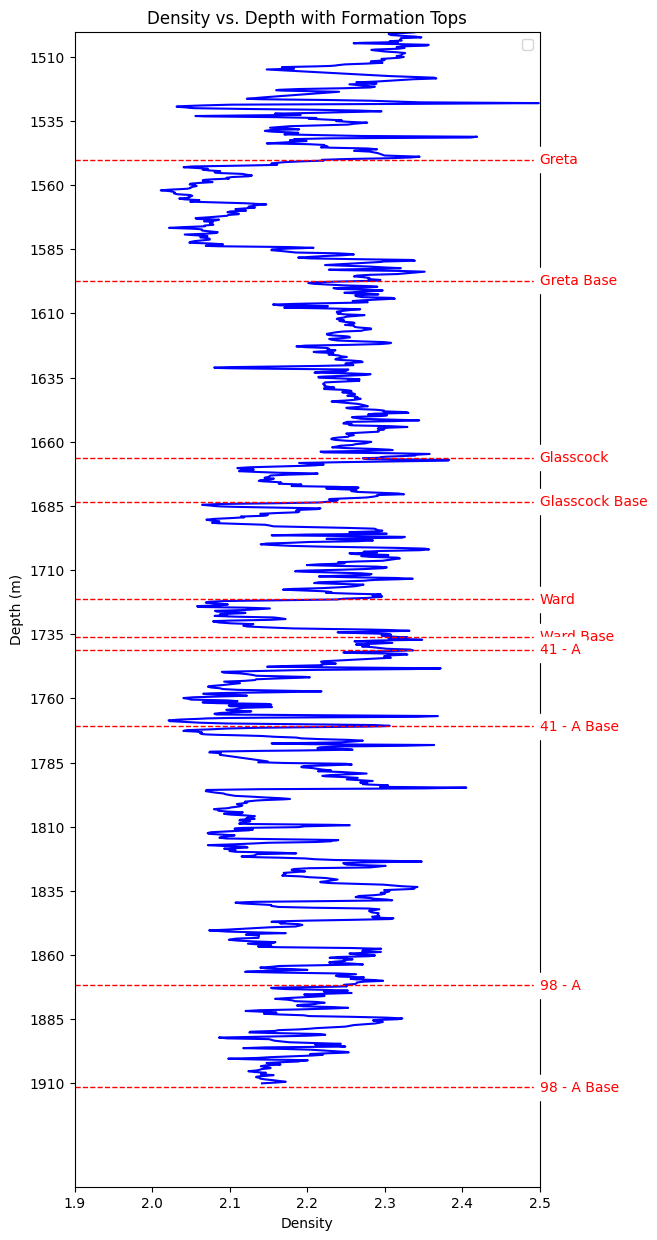

In [54]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_DEN = log_data[:, 3]  # Customize this based on your parameter names and number of column

# Plotting the selected log against depth
plt.figure(figsize=(6, 15))
plt.plot(log_DEN, depths, color='blue')
plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter
plt.xlim(1.9, 2.5)

# Set y-axis range for depth
plt.ylim(1910, 1500)

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Density')
plt.ylabel('Depth (m)')

plt.ylim(1950, 1500)

plt.title('Density vs. Depth with Formation Tops')
plt.legend()
plt.show()


## Neutron Porosity Log

No handles with labels found to put in legend.


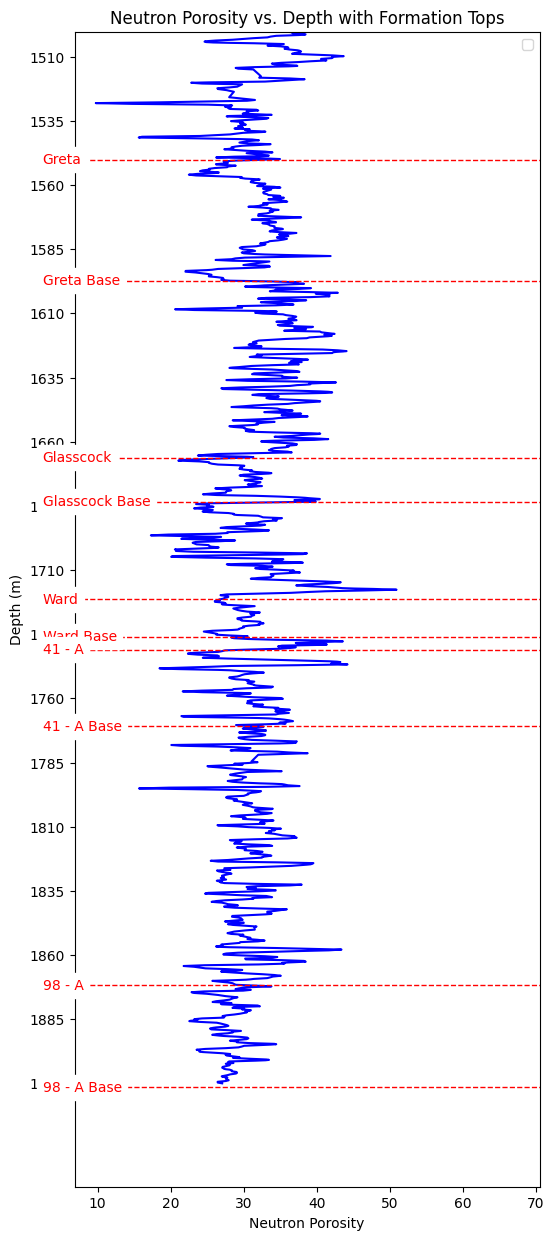

In [55]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_NPRL = log_data[:, 13] # Customize this based on your parameter names

# Plotting the selected log against depth
plt.figure(figsize=(6, 15))
plt.plot(log_NPRL, depths, color='blue')
plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth
plt.ylim(1910, 1500)

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Neutron Porosity')
plt.ylabel('Depth (m)')

plt.ylim(1950, 1500)

plt.title(f'Neutron Porosity vs. Depth with Formation Tops')
plt.legend()
plt.show()


No handles with labels found to put in legend.


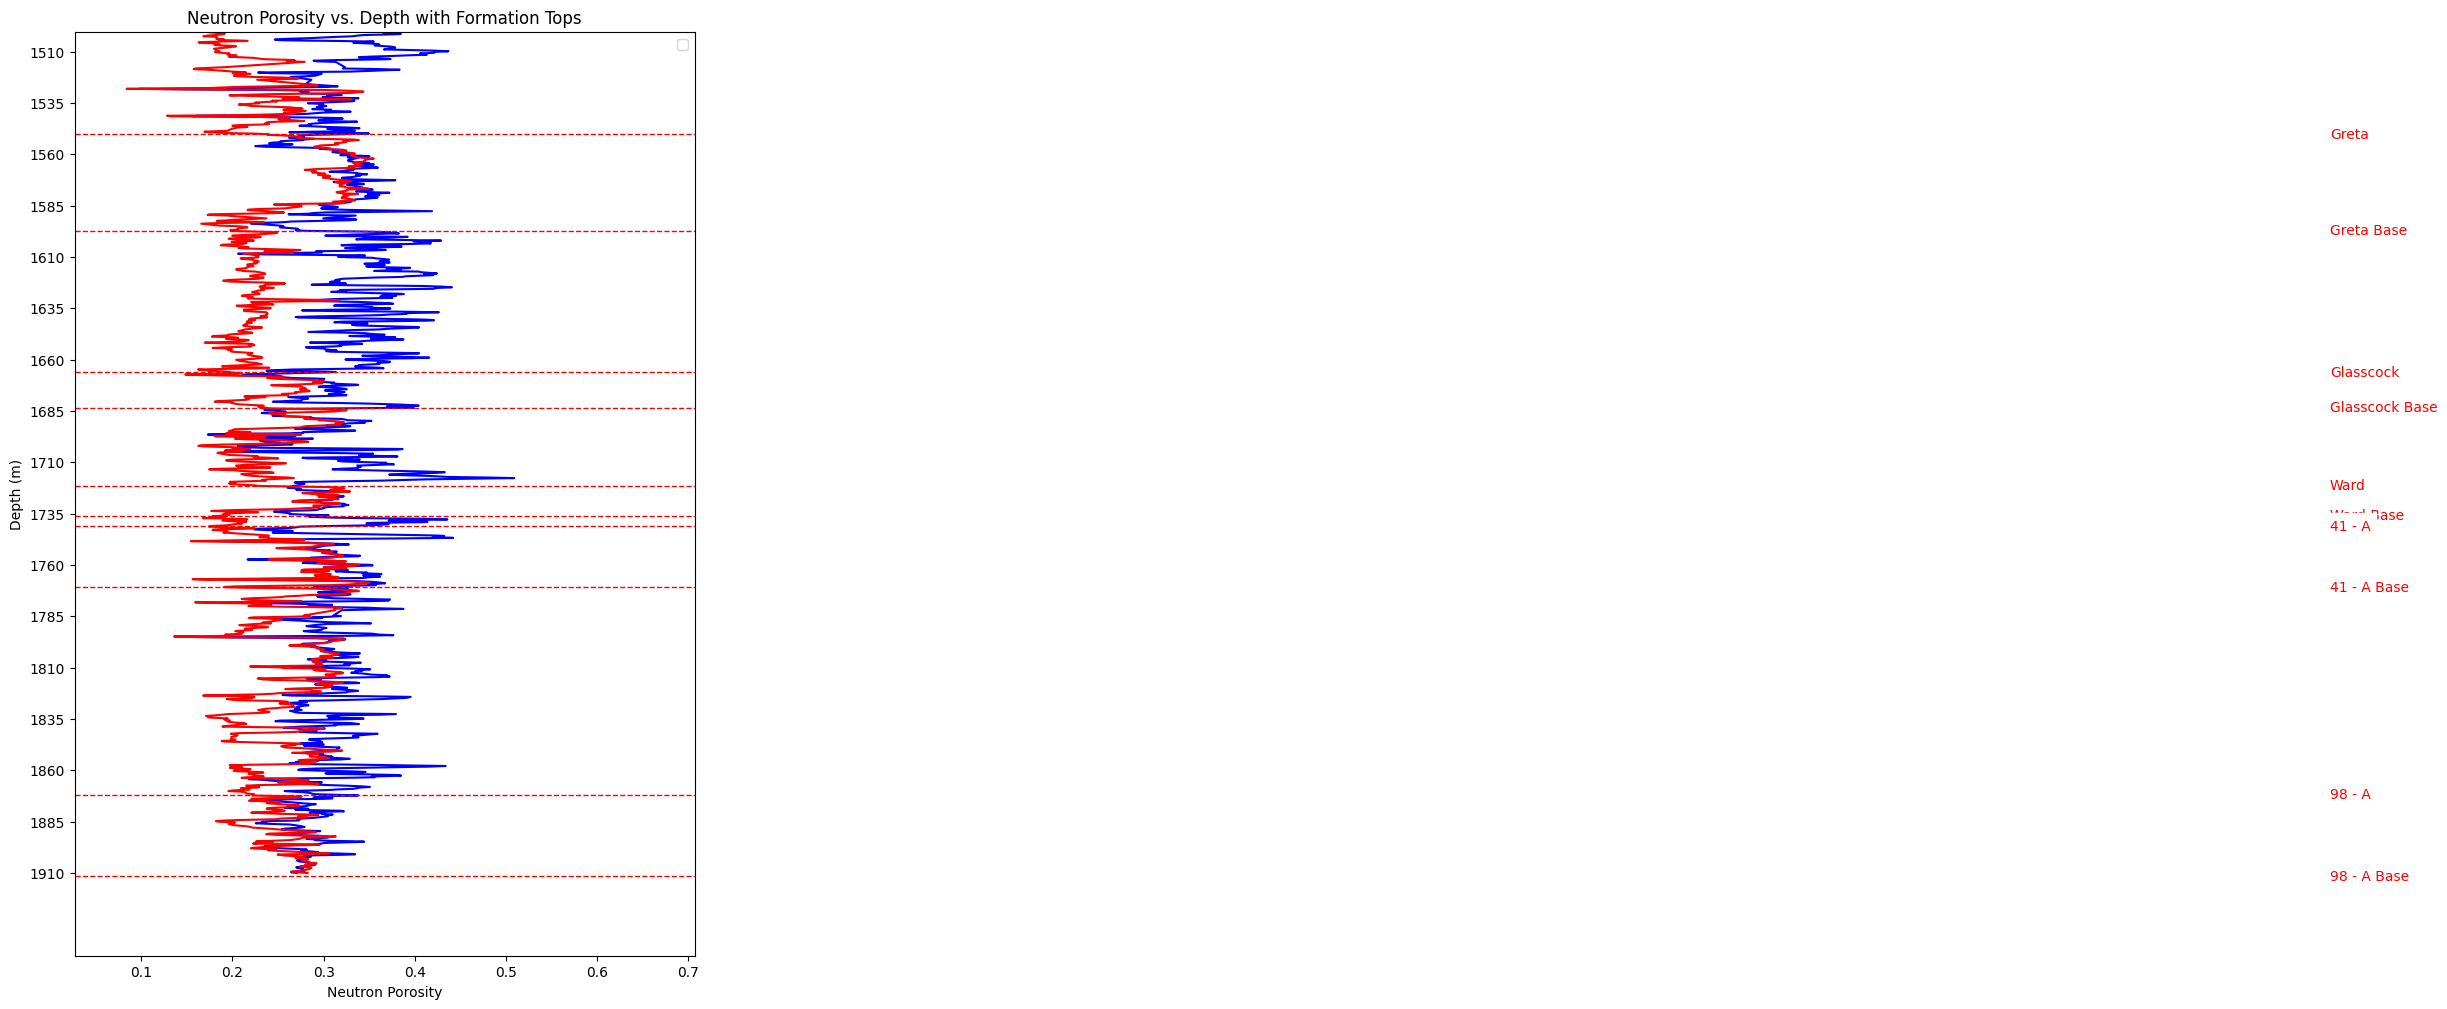

In [56]:
import numpy as np
import pandas as pd

# Define matrix and fluid densities
rho_matrix = 2.65  # For sandstone, for example
rho_fluid = 0.85      # For water, assuming the formation contains water

# Assuming log_DEN is your bulk density log
bulk_density = log_DEN  # Replace with the actual column from your data

# Calculate porosity from density
porosity_density = (rho_matrix - bulk_density) / (rho_matrix - rho_fluid)


# Plotting the selected log against depth
plt.figure(figsize=(8, 12))
plt.plot(log_NPRL/100, depths, color='blue')
plt.plot(porosity_density, depths, color='red')

plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set y-axis range for depth
plt.ylim(1910, 1500)

# Mark formation tops with labels
# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Neutron Porosity')
plt.ylabel('Depth (m)')

plt.ylim(1950, 1500)

plt.title(f'Neutron Porosity vs. Depth with Formation Tops')
plt.legend()
plt.show()

## Gamma Ray Log

No handles with labels found to put in legend.


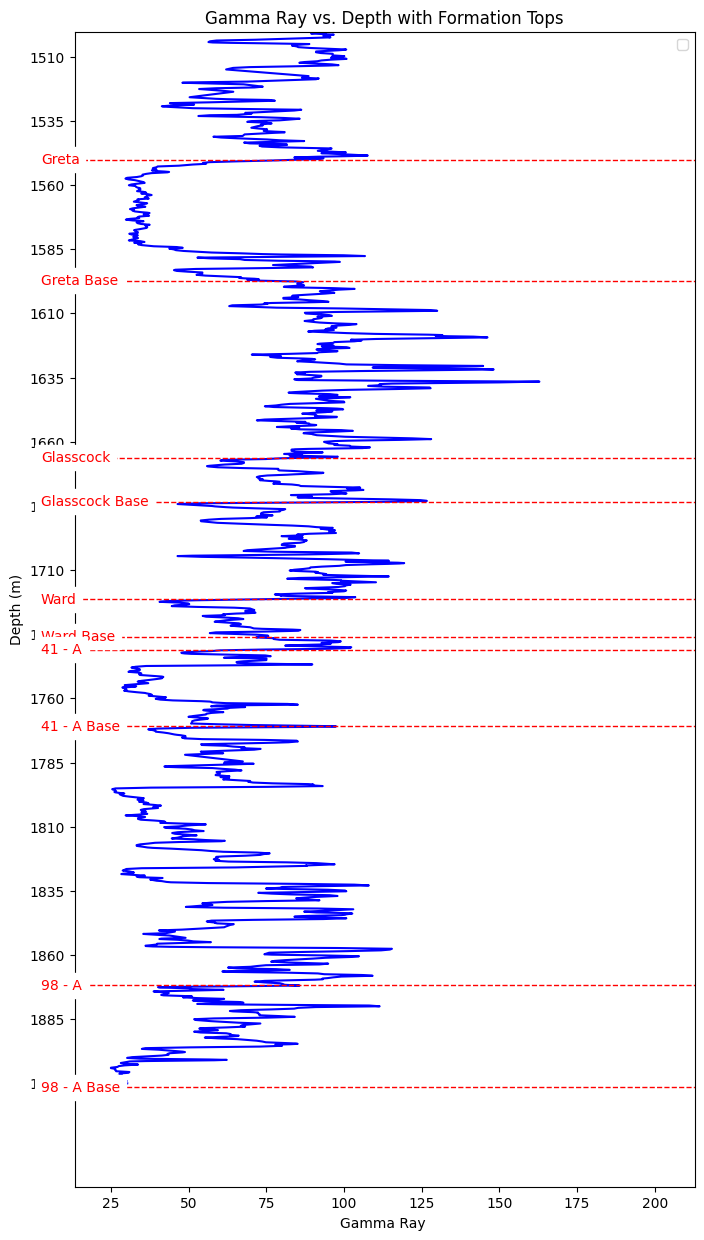

In [57]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_GRGC = log_data[:, 11] # Customize this based on your parameter names

# Plotting the selected log against depth
plt.figure(figsize=(8, 15))
plt.plot(log_GRGC, depths, color='blue')
plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth
plt.ylim(1910, 1500)

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Gamma Ray ')
plt.ylabel('Depth (m)')

plt.ylim(1950, 1500)

plt.title(f'Gamma Ray vs. Depth with Formation Tops')
plt.legend()
plt.show()


## Vp log

No handles with labels found to put in legend.


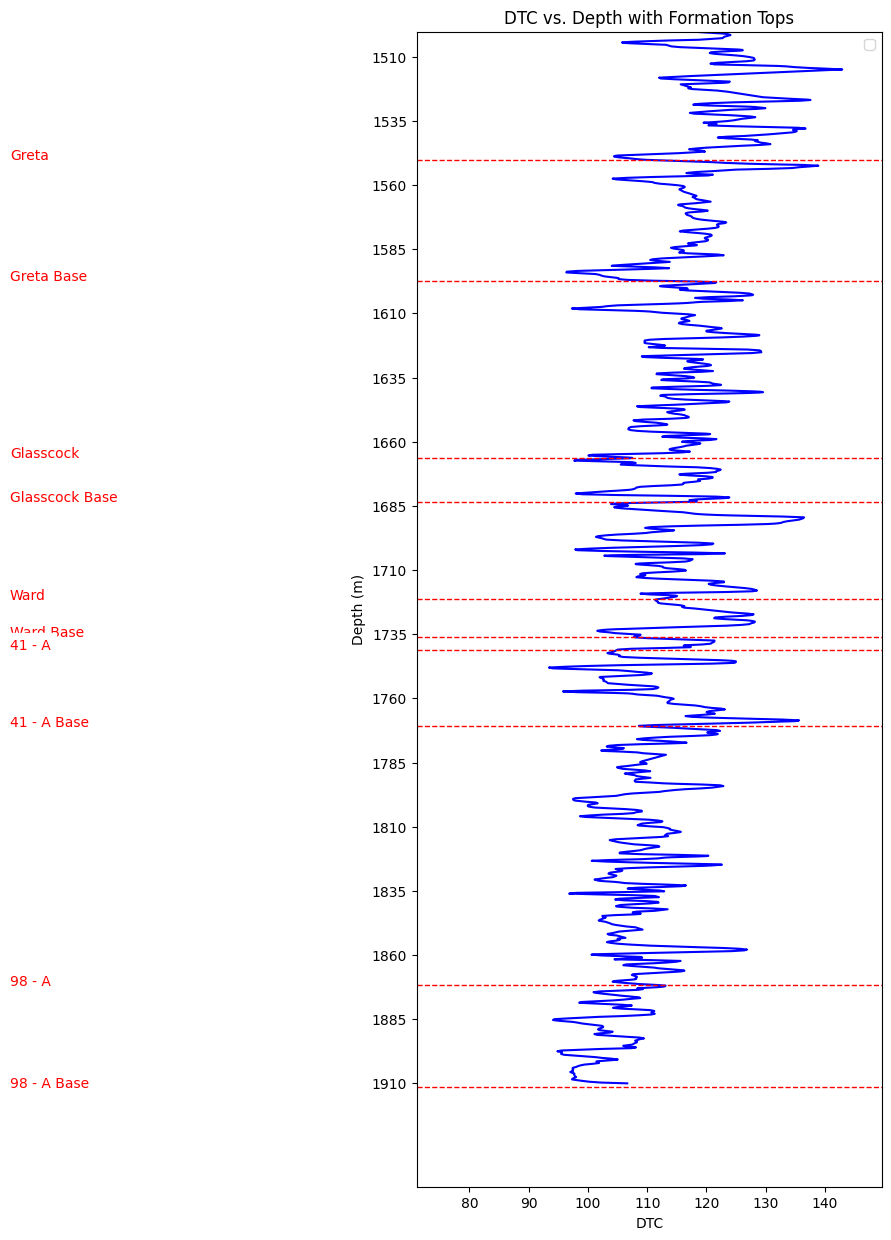

In [58]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_DTC = log_data[:, 5]  # Customize this based on your parameter names

# Plotting the selected log against depth
plt.figure(figsize=(6, 15))
plt.plot(log_DTC, depths, color='blue')
plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth
plt.ylim(1910, 1500)

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
       fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('DTC')
plt.ylabel('Depth (m)')

plt.ylim(1950, 1500)

plt.title('DTC vs. Depth with Formation Tops')
plt.legend()
plt.show()


No handles with labels found to put in legend.


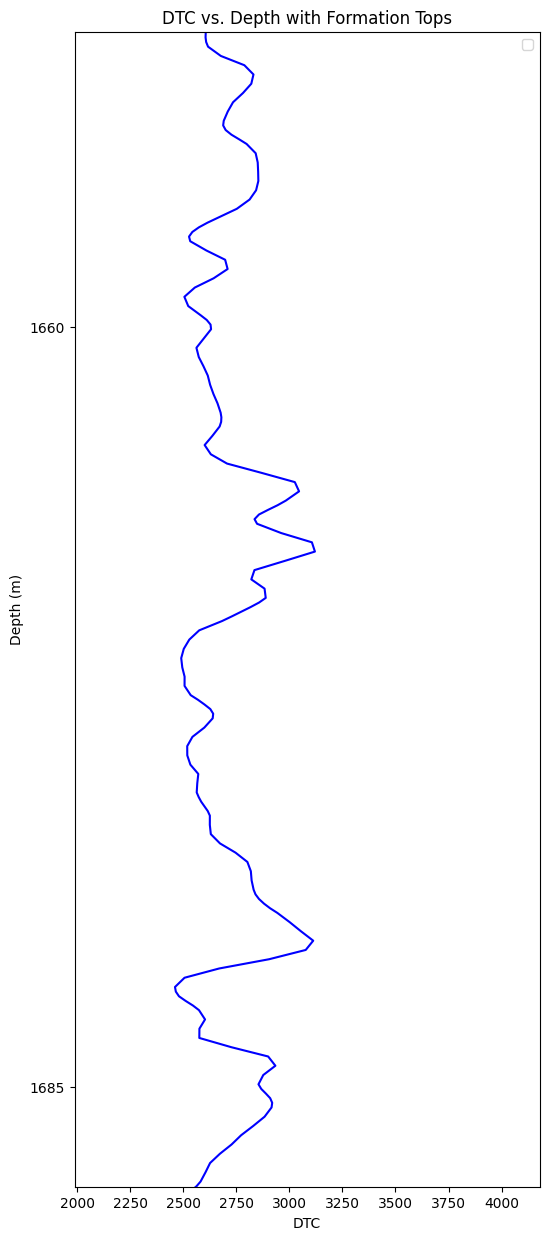

In [59]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)

# Plotting the selected log against depth
plt.figure(figsize=(6, 15))
plt.plot(1e6* 0.3048 / log_DTC, depths, color='blue')
plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth
plt.ylim(1910, 1500)


# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('DTC')
plt.ylabel('Depth (m)')

plt.ylim(1688, 1650)

plt.title('DTC vs. Depth with Formation Tops')
plt.legend()
plt.show()


## DTSX 

No handles with labels found to put in legend.


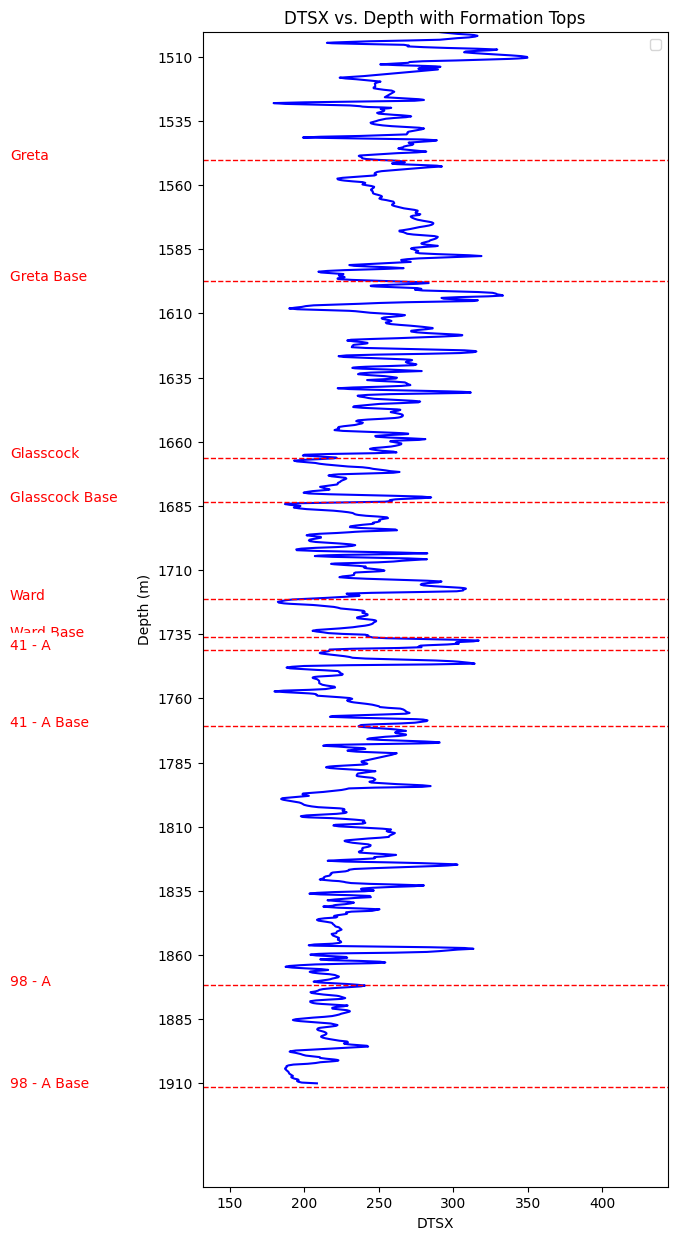

In [60]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_DTSX = log_data[:, 7] # Customize this based on your parameter names

# Plotting the selected log against depth
plt.figure(figsize=(6, 15))
plt.plot(log_DTSX, depths, color='blue')
plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth
plt.ylim(1910, 1500)

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
       fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('DTSX')
plt.ylabel('Depth (m)')

plt.ylim(1950, 1500)

plt.title(f'DTSX vs. Depth with Formation Tops')
plt.legend()
plt.show()

## Vp/Vs 

No handles with labels found to put in legend.


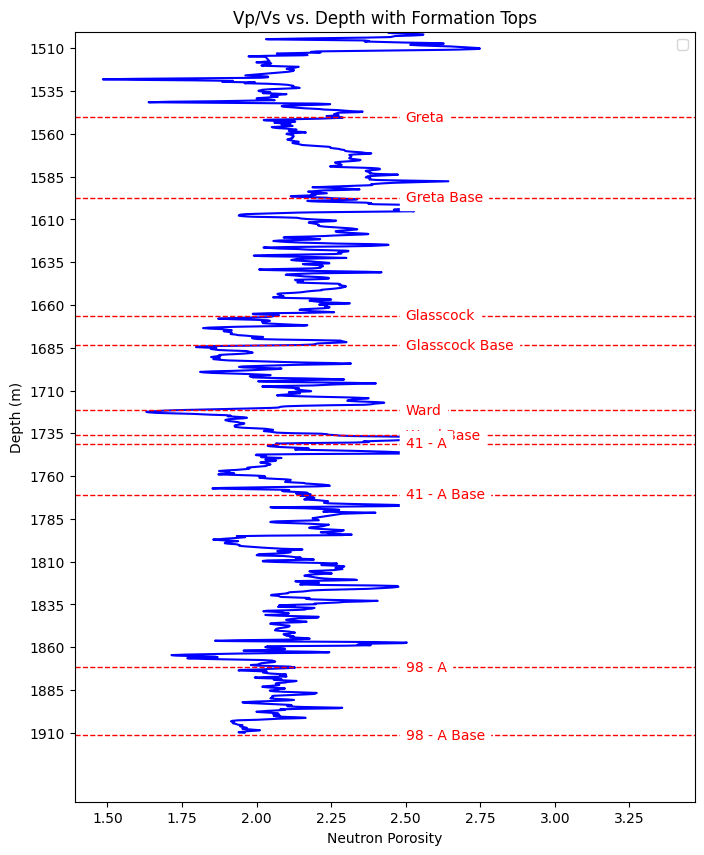

In [61]:
# Example: Choose which log parameter to plot (e.g., log index 1 for the second parameter)
log_VPVX = log_data[:, 14]  # Customize this based on your parameter names

# Plotting the selected log against depth
plt.figure(figsize=(8, 10))
plt.plot(log_VPVX, depths, color='blue')
# plt.plot(log_DTSX/log_DTC, depths, color='red')

plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth
plt.ylim(1910, 1500)

# Mark formation tops with labels
for formation in formations:
    plt.axhline(y=formation['top'], color='red', linestyle='--', linewidth=1)
    plt.text(2.5, formation['top'], formation['name'], 
             va='center', ha='left', fontsize=10, color='red', backgroundcolor='white')

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 25  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('Neutron Porosity')
plt.ylabel('Depth (m)')

plt.ylim(1950, 1500)

plt.title('Vp/Vs vs. Depth with Formation Tops')
plt.legend()
plt.show()


## Dry property

In [62]:
log_DTC = log_data[:, 5]  # Compressional slowness (μs/ft)
log_DTSX = log_data[:, 7]  # Shear slowness (μs/ft)
log_DEN = log_data[:, 3]  # Density log (g/cc)

# Convert slowness to velocity (m/s)
Vp = 304800 / log_DTC  # Convert DTC to P-wave velocity (m/s)
Vs = 304800 / log_DTSX  # Convert DTSX to S-wave velocity (m/s)

# Convert density from g/cc to kg/m³
rho = log_DEN * 1000  # Convert density to kg/m³

#Compute Shear Modulus (G_dry)
G_dry = rho * Vs**2  # Shear modulus (Pa)

#Compute Bulk Modulus (K_dry) for dry rock
K_dry = rho * (Vp**2 - (4/3) * Vs**2)  # Bulk modulus (Pa)


No handles with labels found to put in legend.


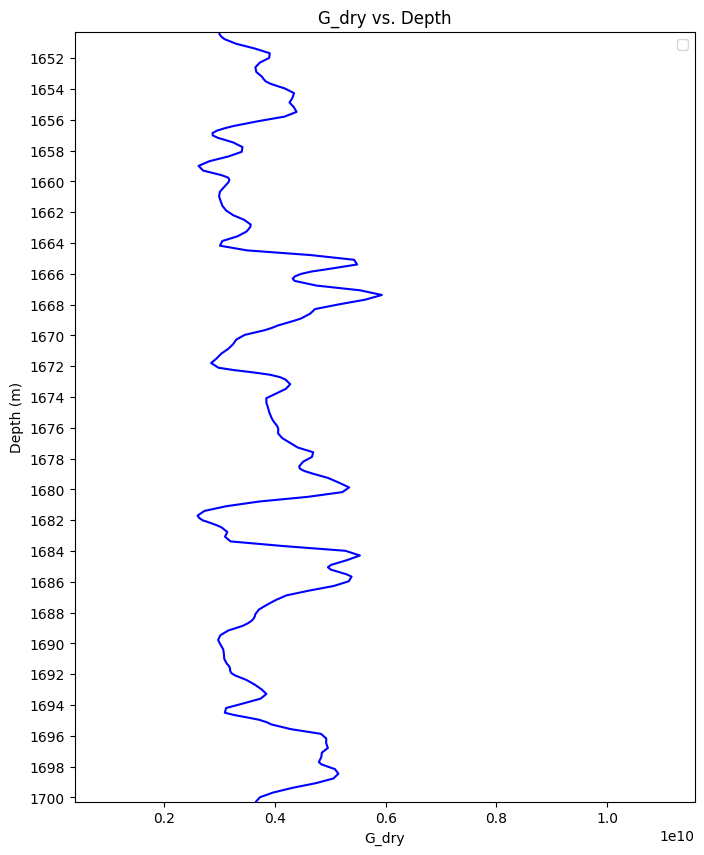

In [63]:
# Plotting the selected log against depth
plt.figure(figsize=(8, 10))
plt.plot(G_dry, depths, color='blue')
# plt.plot(log_DTSX/log_DTC, depths, color='red')

plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth
plt.ylim(1683.041592, 1665.93926)


# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 2  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('G_dry')
plt.ylabel('Depth (m)')

plt.ylim(1700, 1650)

plt.title('G_dry vs. Depth')
plt.legend()
plt.show()

No handles with labels found to put in legend.


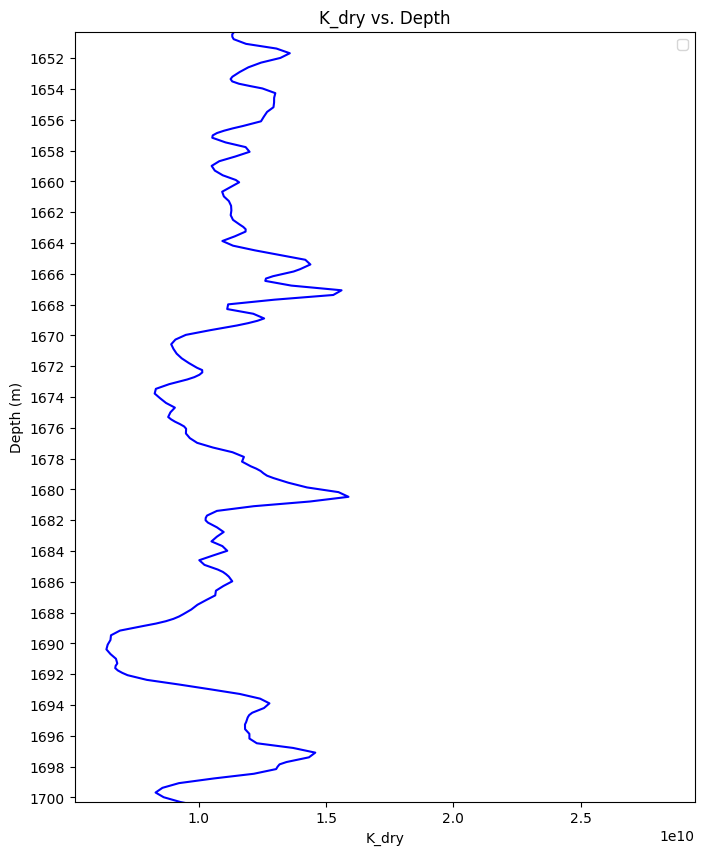

In [64]:
# Plotting the selected log against depth
plt.figure(figsize=(8, 10))
plt.plot(K_dry, depths, color='blue')
# plt.plot(log_DTSX/log_DTC, depths, color='red')

plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth
plt.ylim(1683.041592, 1665.93926)


# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 2  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))

# Labels and title
plt.xlabel('K_dry')
plt.ylabel('Depth (m)')

plt.ylim(1700, 1650)

plt.title('K_dry vs. Depth')
plt.legend()
plt.show()

In [65]:
print(5465.68 * 0.3048),
print(5521.79 * 0.3048)

1665.939264
1683.041592


In [66]:
# Define your depth range (in meters) for which you want to find the min and max values
depth_min_range = 1665.939264  # Adjust this value based on your range
depth_max_range = 1683.041592  # Adjust this value based on your range

# Filter the data to include only values within the specified depth range
depth_filter = (depths >= depth_min_range) & (depths <= depth_max_range)
log_GRGC_filtered = log_GRGC[depth_filter]

# Compute the min and max of the filtered gamma-ray values
GR_min_range = np.min(log_GRGC_filtered)
GR_max_range = np.max(log_GRGC_filtered)

# Print the results
print(f"Gamma Ray Min (in range {depth_min_range}m - {depth_max_range}m): {GR_min_range}")
print(f"Gamma Ray Max (in range {depth_min_range}m - {depth_max_range}m): {GR_max_range}")

Gamma Ray Min (in range 1665.939264m - 1683.041592m): 55.91680145263672
Gamma Ray Max (in range 1665.939264m - 1683.041592m): 126.69599914550781


In [67]:
# Example data (adjust according to your log data)
log_GRGC = log_data[:, 11]  # Gamma Ray log (log_GRGC)
log_porosity_total = porosity_density  # Replace X with the column index of porosity_density
GR_min = 55.91680145263672  # Gamma Ray value for clean sandstone
GR_max = 126.69599914550781  # Gamma Ray value for pure shale

# 1. Calculate Gamma Ray Index (GRI)
I_GR = (log_GRGC - GR_min) / (GR_max - GR_min)

# 2. Calculate Volume of Shale (Vsh) for compacted formations (use the more complex formula)
Vsh = 0.083 * (2**(3.7 * I_GR) - 1)
# Ensure Vsh does not exceed 1 or drop below 0 (to account for outliers in the gamma-ray log)
Vsh = np.clip(Vsh, 0, 1)

# 3. Calculate Effective Porosity
# Effective porosity = Total porosity * (1 - Vsh)
# porosity_eff = log_porosity_total * (1 - Vsh)
# porosity_eff = log_porosity_total - Vsh * 0.1667

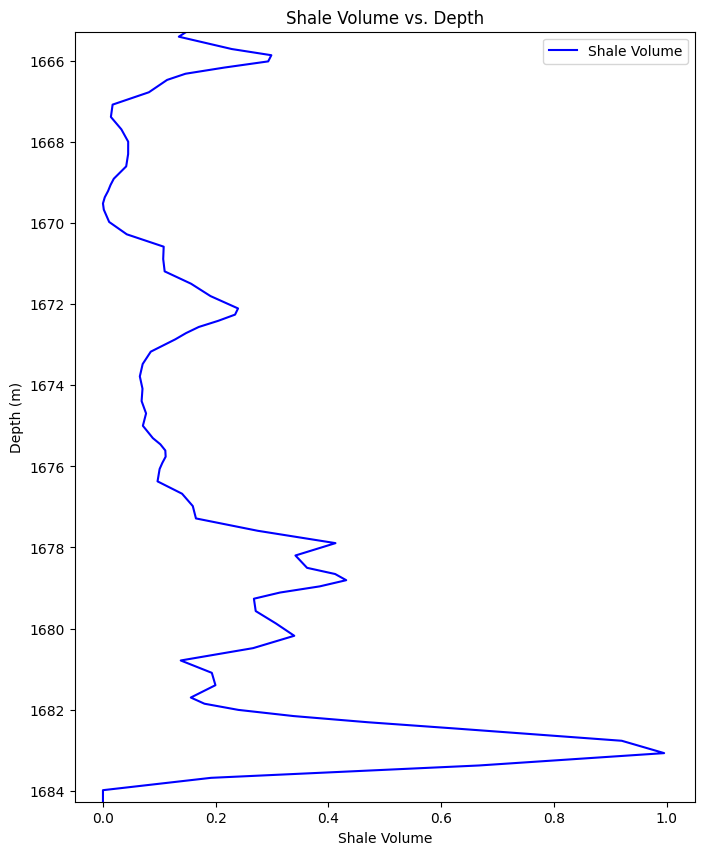

In [68]:
# Plotting the selected log against depth
plt.figure(figsize=(8, 10))


plt.plot(Vsh, depths, color='blue', label='Shale Volume')


plt.gca().invert_yaxis()  # Invert depth axis

# Set x-axis range based on the selected parameter

# Set y-axis range for depth

# Mark formation tops with labels

# Set depth ticks for y-axis
depth_min, depth_max = np.min(depths), np.max(depths)
depth_interval = 2  # Adjust the interval for depth ticks as needed
plt.yticks(np.arange(depth_min, depth_max + depth_interval, depth_interval))


# Labels and title
plt.xlabel('Shale Volume')
plt.ylabel('Depth (m)')

plt.ylim(1684, 1665)

plt.title('Shale Volume vs. Depth')
plt.legend()
plt.show()

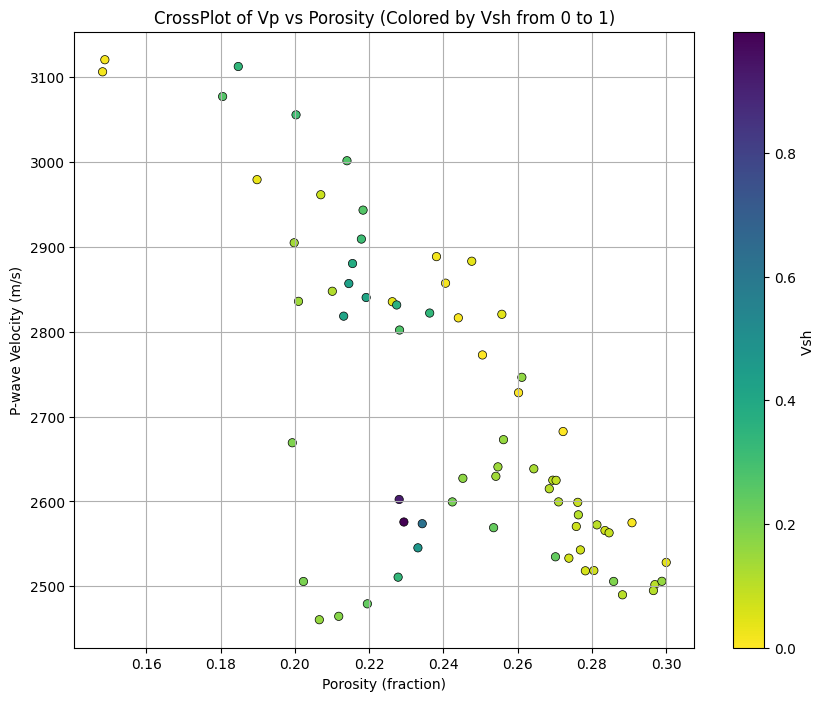

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Set the depth range
a1 = 1665.93926  # lower depth limit
b1 = 1683.04159  # upper depth limit

# Create a mask for the depth range
mask = (depths >= a1) & (depths <= b1)

# Plotting only the data within the specified depth range
plt.figure(figsize=(10, 8))
# Using the 'plasma' colormap
sc = plt.scatter(porosity_density[mask], 1e6 * 0.3048 / log_DTC[mask], c=Vsh[mask], cmap='viridis_r', alpha=1, edgecolor='k', linewidth=0.5)
# sc = plt.scatter(porosity_density[mask], 1e6 * 0.3048 / log_DTC[mask], c=Vsh[mask], cmap='seismic', alpha=0.75, edgecolor='k', linewidth=0.5)

plt.xlabel('Porosity (fraction)')
plt.ylabel('P-wave Velocity (m/s)')
plt.title('CrossPlot of Vp vs Porosity (Colored by Vsh from 0 to 1)'.format(a1, b1))
cbar = plt.colorbar(sc)
cbar.set_label('Vsh ')
plt.grid(True)
plt.show()


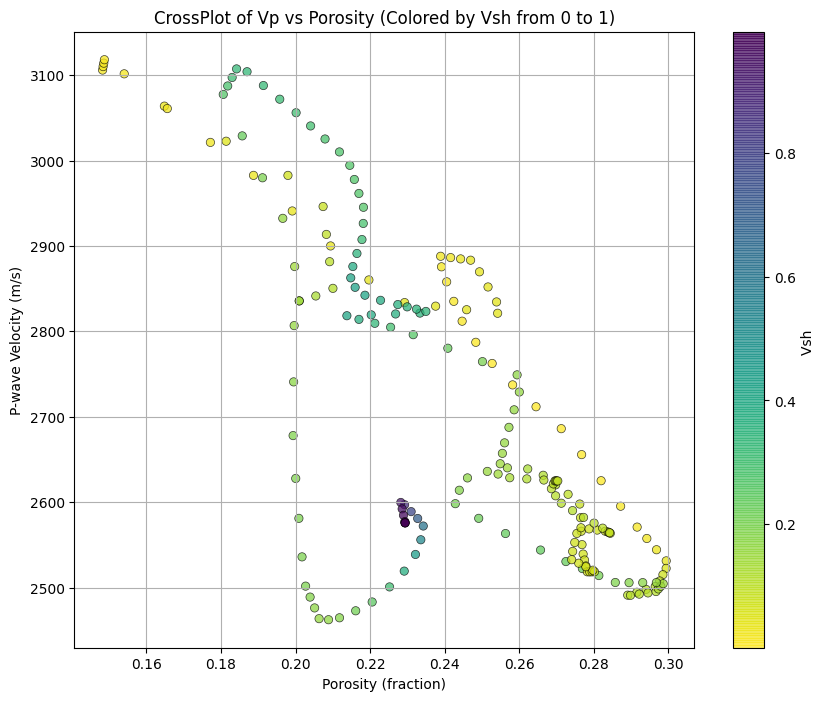

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Set the depth range
a1 = 1665.93926  # lower depth limit
b1 = 1683.04159  # upper depth limit

# Create a mask for the depth range
mask = (depths >= a1) & (depths <= b1)

# Interpolation to increase the number of sampling points
depths_interpolated = np.linspace(a1, b1, 200)  # 500 points between a1 and b1
porosity_density_interpolated = np.interp(depths_interpolated, depths[mask], porosity_density[mask])
log_DTC_interpolated = np.interp(depths_interpolated, depths[mask], log_DTC[mask])
Vsh_interpolated = np.interp(depths_interpolated, depths[mask], Vsh[mask])

# Plotting the interpolated data
plt.figure(figsize=(10, 8))
# Using the 'viridis' colormap
sc = plt.scatter(porosity_density_interpolated, 1e6 * 0.3048 / log_DTC_interpolated, c=Vsh_interpolated, cmap='viridis_r', alpha=0.75, edgecolor='k', linewidth=0.5)

plt.xlabel('Porosity (fraction)')
plt.ylabel('P-wave Velocity (m/s)')
plt.title('CrossPlot of Vp vs Porosity (Colored by Vsh from 0 to 1)')
cbar = plt.colorbar(sc)
cbar.set_label('Vsh ')
plt.grid(True)
plt.show()


## extend the range

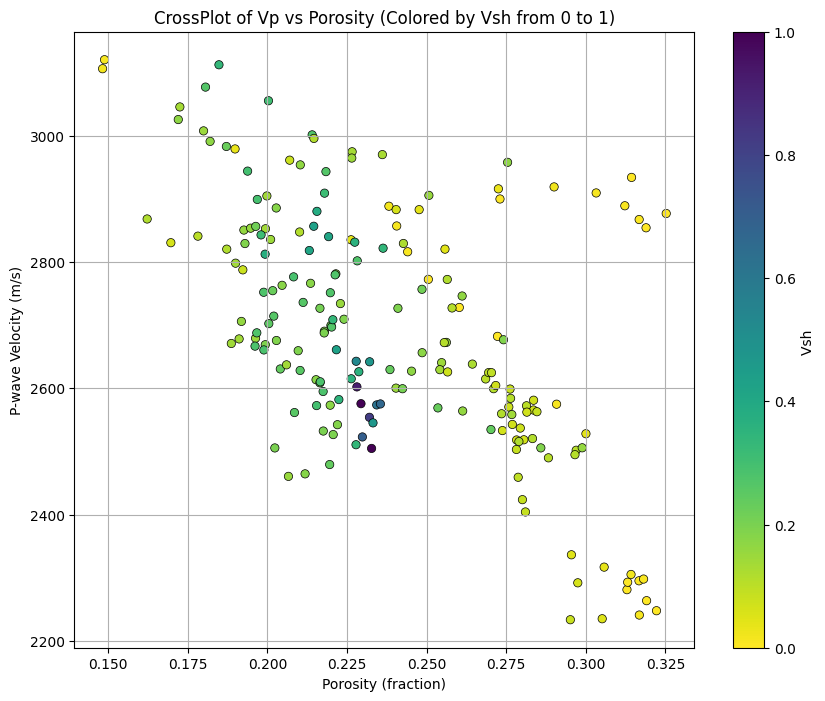

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Set the depth range
a1 = 1650.93926  # lower depth limit
b1 = 1700.04159  # upper depth limit

# Create a mask for the depth range
mask = (depths >= a1) & (depths <= b1)

# Plotting only the data within the specified depth range
plt.figure(figsize=(10, 8))
# Using the 'plasma' colormap
sc = plt.scatter(porosity_density[mask], 1e6 * 0.3048 / log_DTC[mask], c=Vsh[mask], cmap='viridis_r', alpha=1, edgecolor='k', linewidth=0.5)
# sc = plt.scatter(porosity_density[mask], 1e6 * 0.3048 / log_DTC[mask], c=Vsh[mask], cmap='seismic', alpha=0.75, edgecolor='k', linewidth=0.5)

plt.xlabel('Porosity (fraction)')
plt.ylabel('P-wave Velocity (m/s)')
plt.title('CrossPlot of Vp vs Porosity (Colored by Vsh from 0 to 1)'.format(a1, b1))
cbar = plt.colorbar(sc)
cbar.set_label('Vsh ')
plt.grid(True)
plt.show()


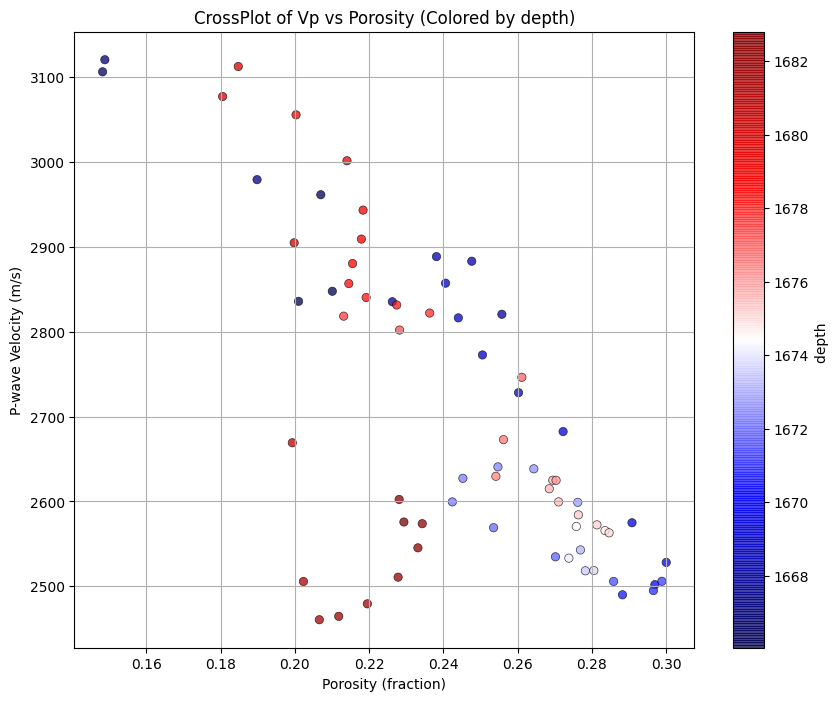

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Set the depth range
a1 = 1665.93926  # lower depth limit
b1 = 1683.04159  # upper depth limit

# Create a mask for the depth range
mask = (depths >= a1) & (depths <= b1)

# Plotting only the data within the specified depth range
plt.figure(figsize=(10, 8))
# Using the 'plasma' colormap
sc = plt.scatter(porosity_density[mask], 1e6 * 0.3048 / log_DTC[mask], c=depths[mask], cmap='seismic', alpha=0.75, edgecolor='k', linewidth=0.5)

plt.xlabel('Porosity (fraction)')
plt.ylabel('P-wave Velocity (m/s)')
plt.title('CrossPlot of Vp vs Porosity (Colored by depth)'.format(a1, b1))
cbar = plt.colorbar(sc)
cbar.set_label('depth ')
plt.grid(True)
plt.show()

# Part 3: Cross-Plot analysis for Lithology Identification

##  1. Vp vs Porosity

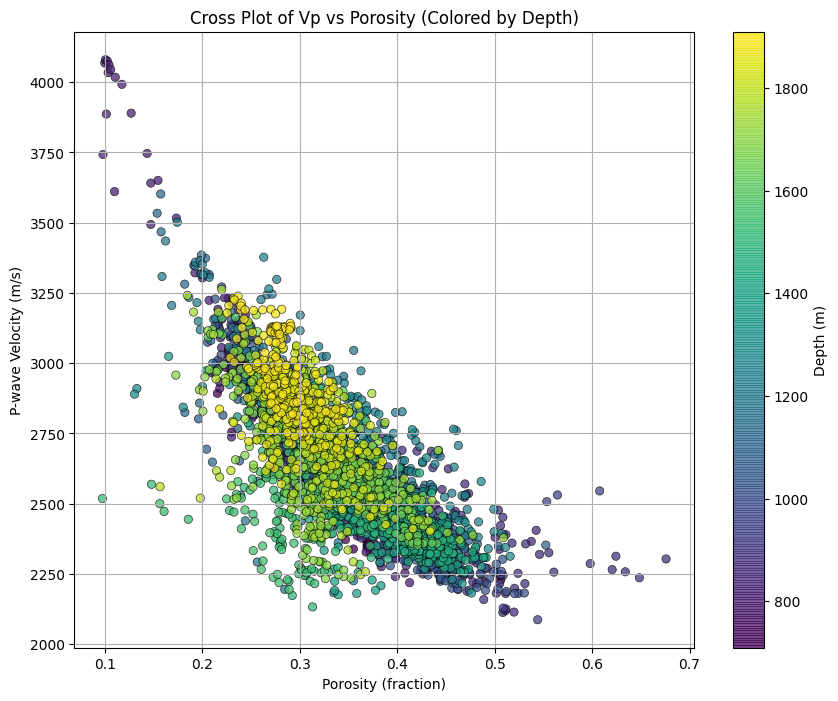

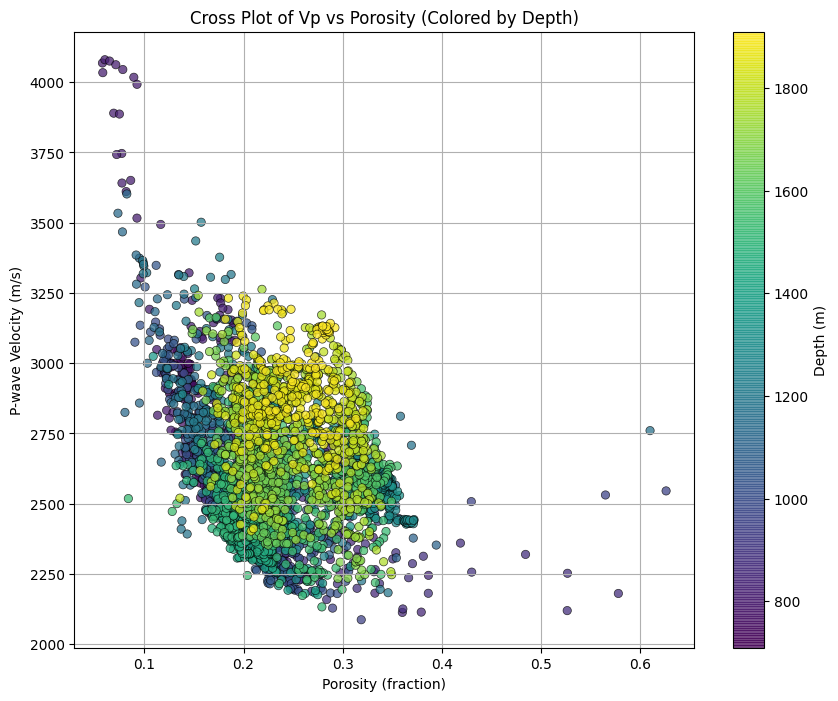

In [73]:
import matplotlib.pyplot as plt

# Plot the Vp vs. Porosity cross-plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(log_NPRL/ 100, 1e6* 0.3048 / log_DTC, c=depths, cmap='viridis', alpha=0.75, edgecolor='k', linewidth=0.5)

plt.xlabel('Porosity (fraction)')
plt.ylabel('P-wave Velocity (m/s)')
plt.title('Cross Plot of Vp vs Porosity (Colored by Depth)')
cbar = plt.colorbar(sc)
cbar.set_label('Depth (m)')
plt.grid(True)


import matplotlib.pyplot as plt

# Plot the Vp vs. Porosity cross-plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(porosity_density, 1e6* 0.3048 / log_DTC, c=depths, cmap='viridis', alpha=0.75, edgecolor='k', linewidth=0.5)

plt.xlabel('Porosity (fraction)')
plt.ylabel('P-wave Velocity (m/s)')
plt.title('Cross Plot of Vp vs Porosity (Colored by Depth)')
cbar = plt.colorbar(sc)
cbar.set_label('Depth (m)')
plt.grid(True)

In [74]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Formation data
# formations = [
#     {"name": "Greta", "top": 5084.82 * 0.3048, "bottom": 5239.32 * 0.3048},
#     {"name": "Glasscock", "top": 5465.68 * 0.3048, "bottom": 5521.79 * 0.3048},
#     {"name": "Ward", "top": 5646.74 * 0.3048, "bottom": 5694.34 * 0.3048},
#     {"name": "41 - A", "top": 5711.09 * 0.3048, "bottom": 5809.12 * 0.3048},
#     {"name": "98 - A", "top": 6140.09 * 0.3048, "bottom": 6270.3 * 0.3048}
# ]

# # Assign formation to each depth
# def assign_formation(md):
#     for formation in formations:
#         if formation["top"] <= md < formation["bottom"]:
#             return formation["name"]
#     return "Unknown"

# # Create the DataFrame with Depth, Porosity, and P-wave velocity
# # Assuming `log_NPRL`, `log_DTC`, and `depths` are arrays of data
# df_sorted = pd.DataFrame({
#     'Depth': depths,
#     'Porosity': porosity_density,  # Convert porosity from percentage to fraction
#     'Vp_m_s': 1e6 * 0.3048 / log_DTC  # Convert DTC to P-wave velocity in meters per second
# })

# # Apply the formation assignment based on depth
# df_sorted['Formation'] = df_sorted['Depth'].apply(assign_formation)

# # Define colors for formations
# formation_colors = {
#     "Greta": 'blue',
#     "Glasscock": 'red',
#     "Ward": 'green',
#     "41 - A": 'orange',
#     "98 - A": 'yellow'
# }

# # Create a plot
# plt.figure(figsize=(10, 8))

# # Plot: Vp vs. Porosity colored by formation
# for formation in formation_colors.keys():
#     subset = df_sorted[df_sorted['Formation'] == formation]
#     plt.scatter(subset['Porosity'], subset['Vp_m_s'], 
#                 color=formation_colors[formation], 
#                 label=formation, alpha=0.75, edgecolor='k', linewidth=0.5)

# # Labeling and grid
# plt.xlabel('Porosity (fraction)')
# plt.ylabel('P-wave Velocity (m/s)')
# plt.title('Cross Plot of Vp vs Porosity (Colored by Formation)')
# plt.legend()
# plt.grid(True)

# # Show plot
# plt.tight_layout()
# plt.show()


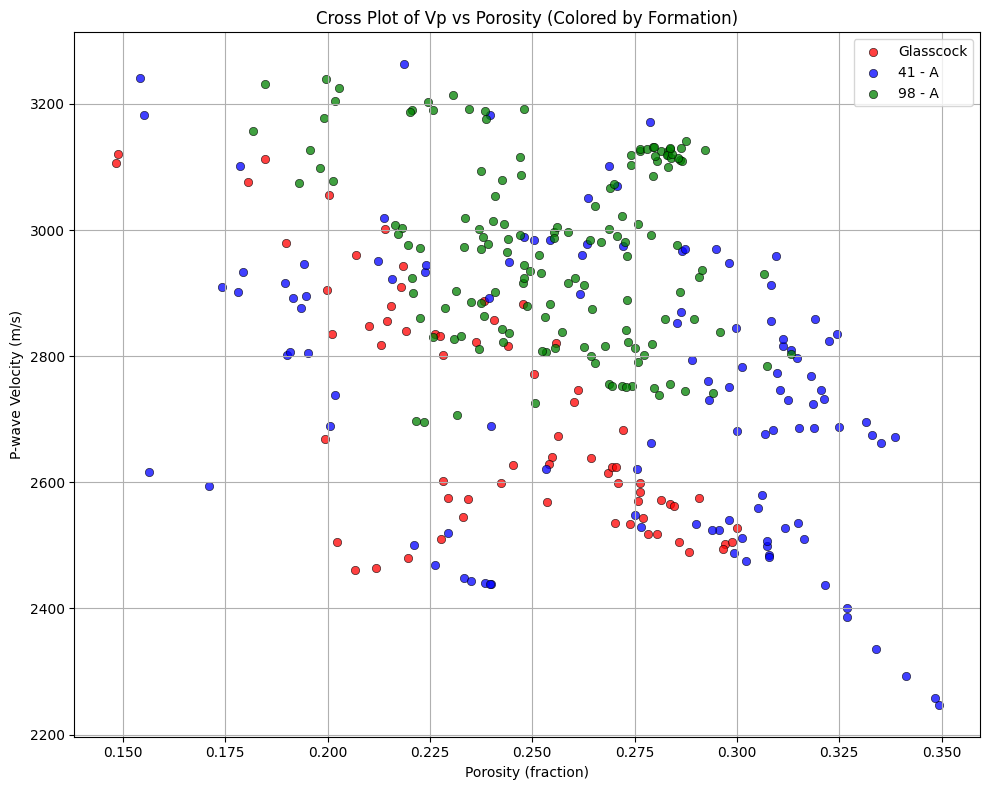

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Formation data
formations = [
#    {"name": "Greta", "top": 5084.82 * 0.3048, "bottom": 5239.32 * 0.3048},
    {"name": "Glasscock", "top": 5465.68 * 0.3048, "bottom": 5521.79 * 0.3048},
#    {"name": "Ward", "top": 5646.74 * 0.3048, "bottom": 5694.34 * 0.3048},
    {"name": "41 - A", "top": 5711.09 * 0.3048, "bottom": 5809.12 * 0.3048},
    {"name": "98 - A", "top": 6140.09 * 0.3048, "bottom": 6270.3 * 0.3048}
]

# Assign formation to each depth
def assign_formation(md):
    for formation in formations:
        if formation["top"] <= md < formation["bottom"]:
            return formation["name"]
    return "Unknown"

# Create the DataFrame with Depth, Porosity, and P-wave velocity
# Assuming log_NPRL, log_DTC, and depths are arrays of data
df_sorted = pd.DataFrame({
    'Depth': depths,
    'Porosity': porosity_density,  # Convert porosity from percentage to fraction
    'Vp_m_s': 1e6 * 0.3048 / log_DTC  # Convert DTC to P-wave velocity in meters per second
})

# Apply the formation assignment based on depth
df_sorted['Formation'] = df_sorted['Depth'].apply(assign_formation)

# Define colors for formations
formation_colors = {
    "Glasscock": 'red',
    "41 - A": 'blue',
    "98 - A": 'green'
}

# Create a plot
plt.figure(figsize=(10, 8))

# Plot: Vp vs. Porosity colored by formation
for formation in formation_colors.keys():
    subset = df_sorted[df_sorted['Formation'] == formation]
    plt.scatter(subset['Porosity'], subset['Vp_m_s'], 
                color=formation_colors[formation], 
                label=formation, alpha=0.75, edgecolor='k', linewidth=0.5)

# Labeling and grid
plt.xlabel('Porosity (fraction)')
plt.ylabel('P-wave Velocity (m/s)')
plt.title('Cross Plot of Vp vs Porosity (Colored by Formation)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

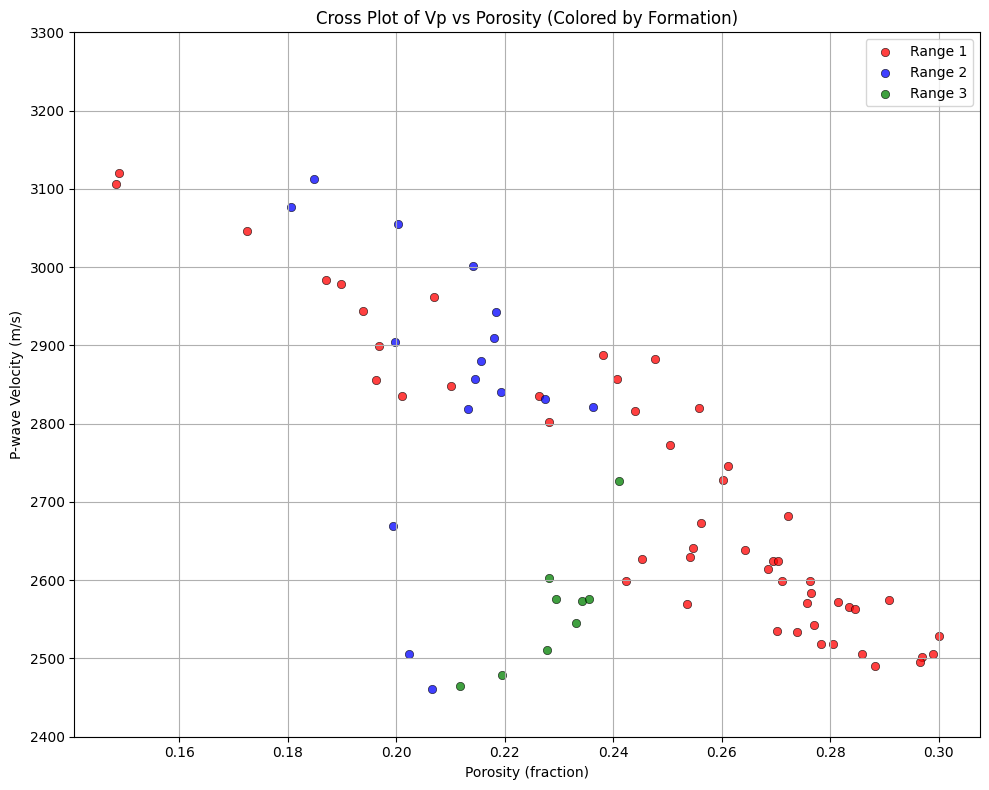

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Formation data
formations = [
#    {"name": "Greta", "top": 5084.82 * 0.3048, "bottom": 5239.32 * 0.3048},
    {"name": "Range 1", "top": 1665, "bottom": 1677.5},
#    {"name": "Ward", "top": 1676, "bottom": 1681.5},
    {"name": "Range 2", "top": 1677.5, "bottom": 1681.5},
    {"name": "Range 3", "top":1681.5, "bottom": 1683.7}
]

# Assign formation to each depth
def assign_formation(md):
    for formation in formations:
        if formation["top"] <= md < formation["bottom"]:
            return formation["name"]
    return "Unknown"

# Create the DataFrame with Depth, Porosity, and P-wave velocity
# Assuming log_NPRL, log_DTC, and depths are arrays of data
df_sorted = pd.DataFrame({
    'Depth': depths,
    'Porosity': porosity_density,  # Convert porosity from percentage to fraction
    'Vp_m_s': 1e6 * 0.3048 / log_DTC  # Convert DTC to P-wave velocity in meters per second
})

# Apply the formation assignment based on depth
df_sorted['Formation'] = df_sorted['Depth'].apply(assign_formation)

# Define colors for formations
formation_colors = {
    "Range 1": 'red',
    "Range 2": 'blue',
    "Range 3": 'green'
}

# Create a plot
plt.figure(figsize=(10, 8))

# Plot: Vp vs. Porosity colored by formation
for formation in formation_colors.keys():
    subset = df_sorted[df_sorted['Formation'] == formation]
    plt.scatter(subset['Porosity'], subset['Vp_m_s'], 
                color=formation_colors[formation], 
                label=formation, alpha=0.75, edgecolor='k', linewidth=0.5)

# Labeling and grid
plt.xlabel('Porosity (fraction)')
plt.ylabel('P-wave Velocity (m/s)')

plt.ylim(2400, 3300)  # Example limits, adjust as needed


plt.title('Cross Plot of Vp vs Porosity (Colored by Formation)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

##  2. Vp vs Vs

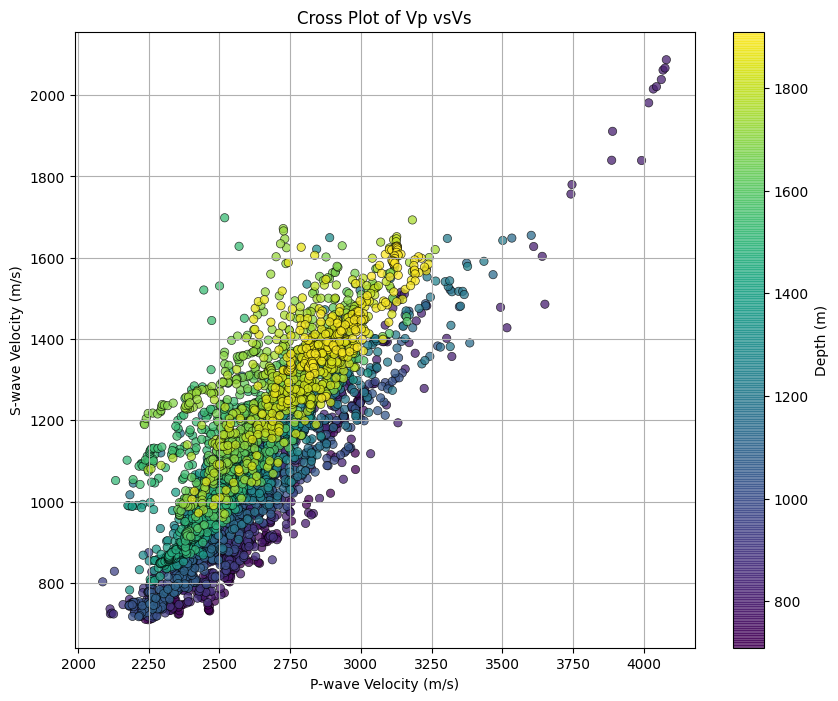

In [77]:
import matplotlib.pyplot as plt

# Plot the Vp vs.Vs cross-plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(1e6* 0.3048 / log_DTC, 1e6* 0.3048 / log_DTSX, c=depths, cmap='viridis', alpha=0.75, edgecolor='k', linewidth=0.5)

plt.xlabel('P-wave Velocity (m/s)')
plt.ylabel('S-wave Velocity (m/s)')
plt.title('Cross Plot of Vp vsVs')
cbar = plt.colorbar(sc)
cbar.set_label('Depth (m)')
plt.grid(True)

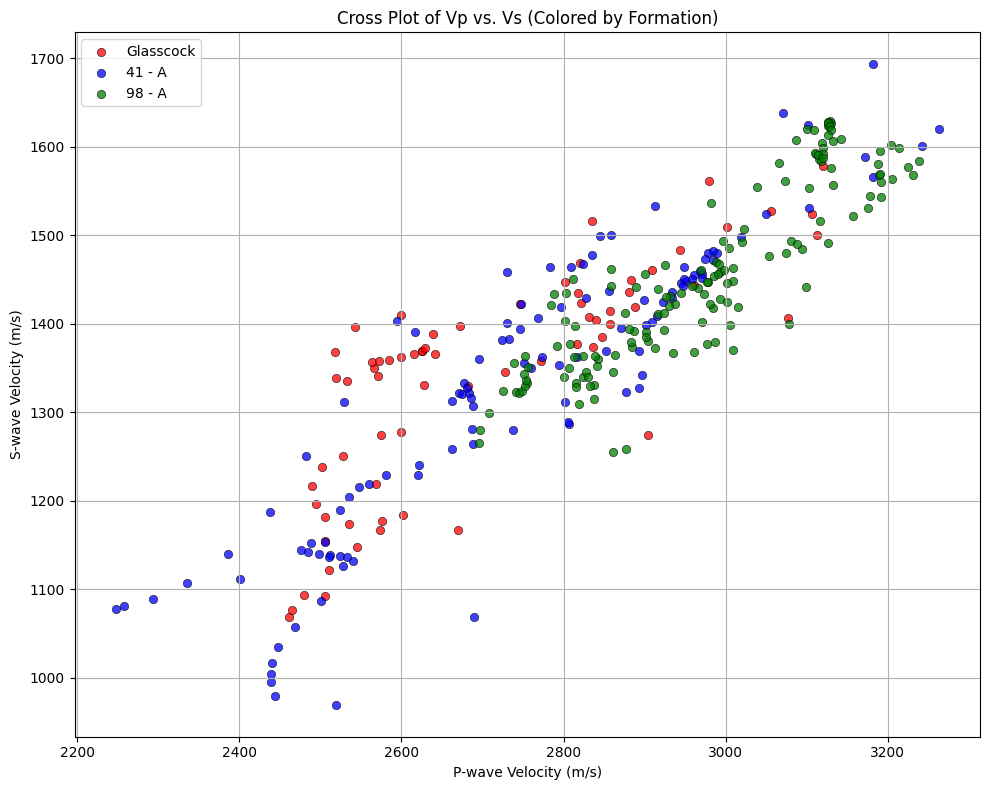

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Formation data
formations = [
    # {"name": "Greta", "top": 5084.82 * 0.3048, "bottom": 5239.32 * 0.3048},
    {"name": "Glasscock", "top": 5465.68 * 0.3048, "bottom": 5521.79 * 0.3048},
    # {"name": "Ward", "top": 5646.74 * 0.3048, "bottom": 5694.34 * 0.3048},
    {"name": "41 - A", "top": 5711.09 * 0.3048, "bottom": 5809.12 * 0.3048},
    {"name": "98 - A", "top": 6140.09 * 0.3048, "bottom": 6270.3 * 0.3048}
]

# Assign formation to each depth
def assign_formation(md):
    for formation in formations:
        if formation["top"] <= md < formation["bottom"]:
            return formation["name"]
    return "Unknown"

# Create the DataFrame with Depth, Vp, and Vs
# Assuming `log_DTC`, `log_DTSX`, and `depths` are arrays of data
df_sorted = pd.DataFrame({
    'Depth': depths,
    'Vp_m_s': 1e6 * 0.3048 / log_DTC,  # Convert DTC to P-wave velocity (Vp) in meters per second
    'Vs_m_s': 1e6 * 0.3048 / log_DTSX  # Convert DTSX to S-wave velocity (Vs) in meters per second
})

# Apply the formation assignment based on depth
df_sorted['Formation'] = df_sorted['Depth'].apply(assign_formation)

# Define colors for formations
formation_colors = {
    "Glasscock": 'red',
    "41 - A": 'blue',
    "98 - A": 'green'
}

# Create a plot for Vp vs. Vs colored by formation
plt.figure(figsize=(10, 8))

# Plot: Vp vs. Vs colored by formation
for formation in formation_colors.keys():
    subset = df_sorted[df_sorted['Formation'] == formation]
    plt.scatter(subset['Vp_m_s'], subset['Vs_m_s'], 
                color=formation_colors[formation], 
                label=formation, alpha=0.75, edgecolor='k', linewidth=0.5)

# Labeling and grid
plt.xlabel('P-wave Velocity (m/s)')
plt.ylabel('S-wave Velocity (m/s)')
plt.title('Cross Plot of Vp vs. Vs (Colored by Formation)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


##  3. Density vs. Vp Cross-Plot

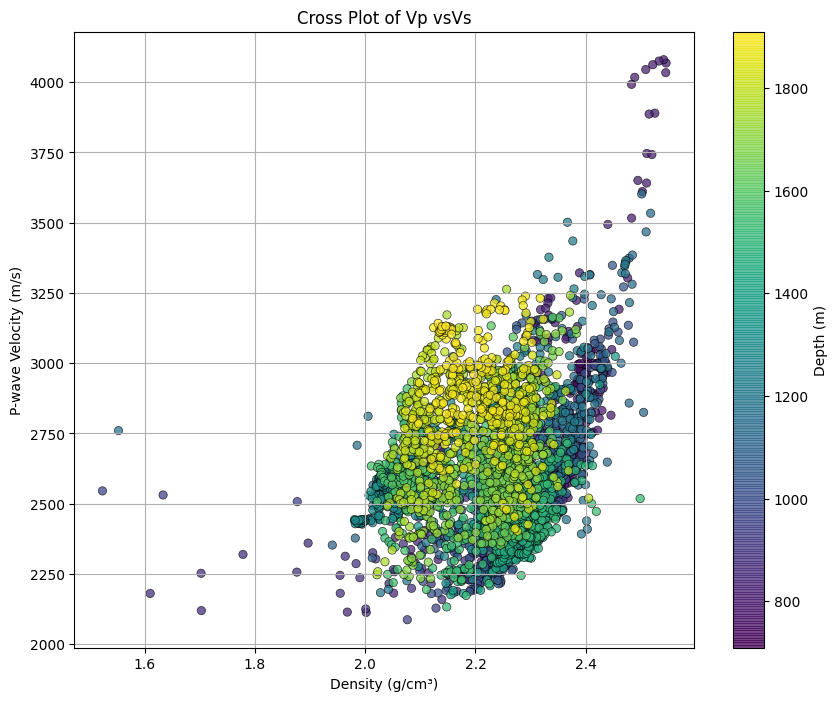

In [79]:
import matplotlib.pyplot as plt

# Plot the Vp vs.Vs cross-plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(log_DEN, 1e6* 0.3048 / log_DTC, c=depths, cmap='viridis', alpha=0.75, edgecolor='k', linewidth=0.5)

plt.xlabel('Density (g/cm³)')
plt.ylabel('P-wave Velocity (m/s)')
plt.title('Cross Plot of Vp vsVs')
cbar = plt.colorbar(sc)
cbar.set_label('Depth (m)')
plt.grid(True)

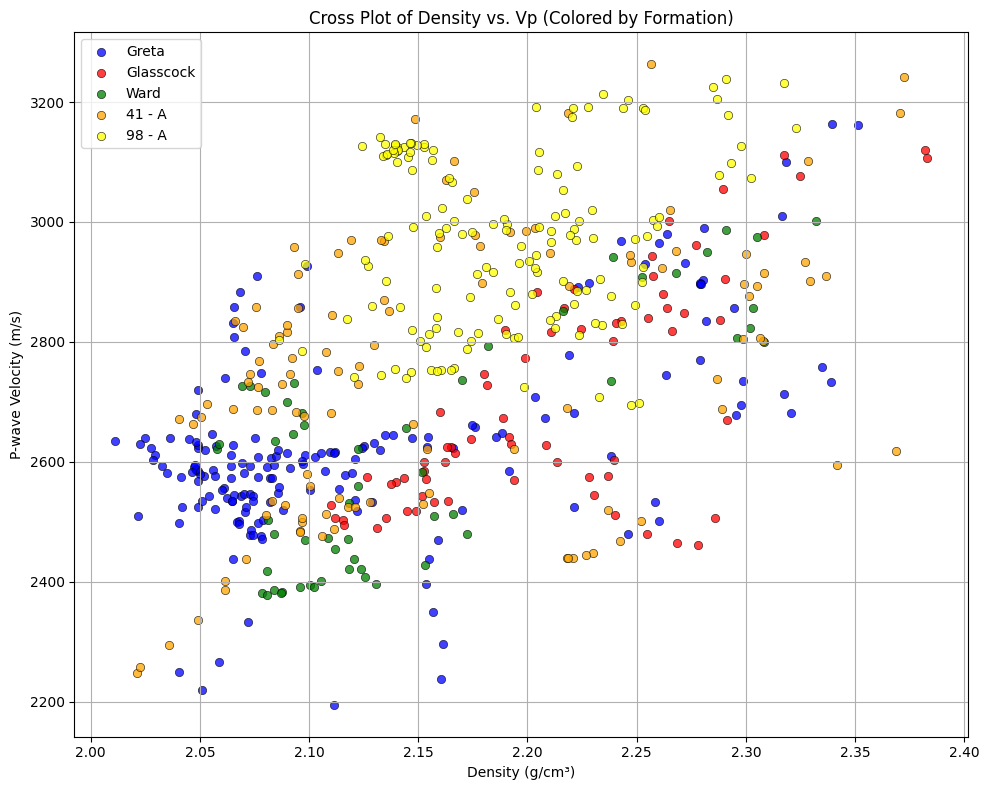

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Formation data
formations = [
    {"name": "Greta", "top": 5084.82 * 0.3048, "bottom": 5239.32 * 0.3048},
    {"name": "Glasscock", "top": 5465.68 * 0.3048, "bottom": 5521.79 * 0.3048},
    {"name": "Ward", "top": 5646.74 * 0.3048, "bottom": 5694.34 * 0.3048},
    {"name": "41 - A", "top": 5711.09 * 0.3048, "bottom": 5809.12 * 0.3048},
    {"name": "98 - A", "top": 6140.09 * 0.3048, "bottom": 6270.3 * 0.3048}
]

# Assign formation to each depth
def assign_formation(md):
    for formation in formations:
        if formation["top"] <= md < formation["bottom"]:
            return formation["name"]
    return "Unknown"

# Create the DataFrame with Depth, Density, and Vp
# Assuming `log_DEN`, `log_DTC`, and `depths` are arrays of data
df_sorted = pd.DataFrame({
    'Depth': depths,
    'Density': log_DEN,  # Assuming log_DEN is in g/cm³
    'Vp_m_s': 1e6 * 0.3048 / log_DTC  # Convert DTC to P-wave velocity (Vp) in meters per second
})

# Apply the formation assignment based on depth
df_sorted['Formation'] = df_sorted['Depth'].apply(assign_formation)

# Define colors for formations
formation_colors = {
    "Greta": 'blue',
    "Glasscock": 'red',
    "Ward": 'green',
    "41 - A": 'orange',
    "98 - A": 'yellow'
}

# Create a plot for Density vs. Vp colored by formation
plt.figure(figsize=(10, 8))

# Plot: Density vs. Vp colored by formation
for formation in formation_colors.keys():
    subset = df_sorted[df_sorted['Formation'] == formation]
    plt.scatter(subset['Density'], subset['Vp_m_s'], 
                color=formation_colors[formation], 
                label=formation, alpha=0.75, edgecolor='k', linewidth=0.5)

# Labeling and grid
plt.xlabel('Density (g/cm³)')
plt.ylabel('P-wave Velocity (m/s)')
plt.title('Cross Plot of Density vs. Vp (Colored by Formation)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


##  4. Vp vs. Vp/Vs Ratio Cross-Plot

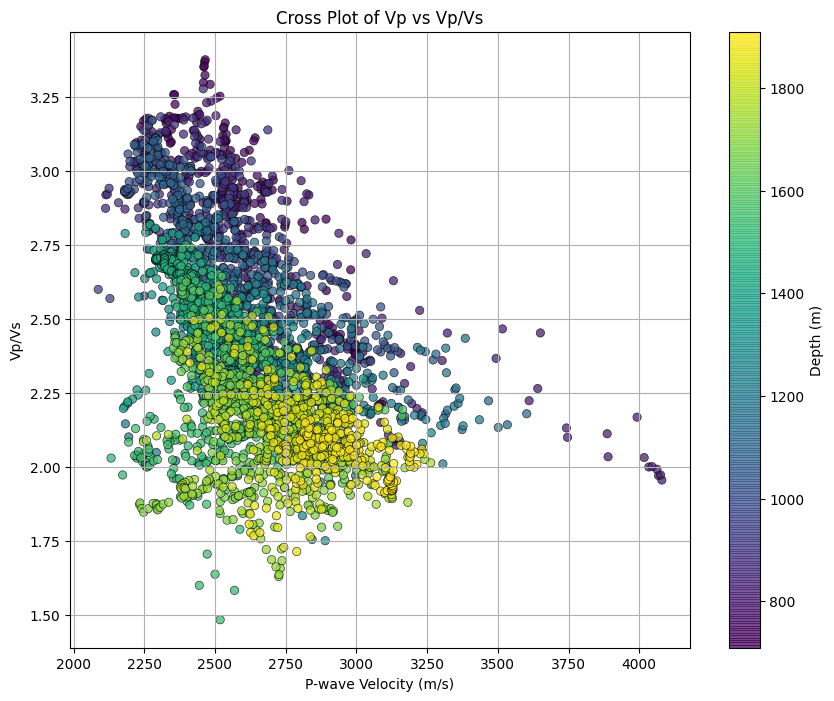

In [81]:
import matplotlib.pyplot as plt

# Plot the Vp vs.Vs cross-plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(1e6* 0.3048 / log_DTC, log_VPVX, c=depths, cmap='viridis', alpha=0.75, edgecolor='k', linewidth=0.5)

plt.xlabel('P-wave Velocity (m/s)')
plt.ylabel('Vp/Vs')
plt.title('Cross Plot of Vp vs Vp/Vs')
cbar = plt.colorbar(sc)
cbar.set_label('Depth (m)')
plt.grid(True)

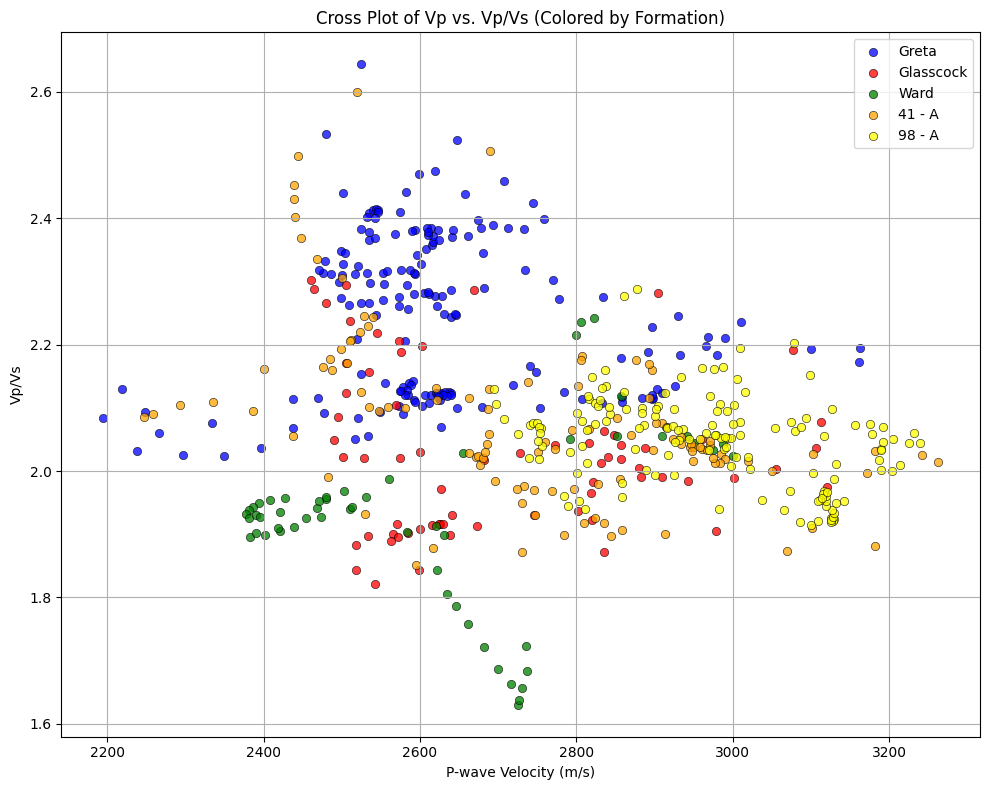

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Formation data
formations = [
    {"name": "Greta", "top": 5084.82 * 0.3048, "bottom": 5239.32 * 0.3048},
    {"name": "Glasscock", "top": 5465.68 * 0.3048, "bottom": 5521.79 * 0.3048},
    {"name": "Ward", "top": 5646.74 * 0.3048, "bottom": 5694.34 * 0.3048},
    {"name": "41 - A", "top": 5711.09 * 0.3048, "bottom": 5809.12 * 0.3048},
    {"name": "98 - A", "top": 6140.09 * 0.3048, "bottom": 6270.3 * 0.3048}
]

# Assign formation to each depth
def assign_formation(md):
    for formation in formations:
        if formation["top"] <= md < formation["bottom"]:
            return formation["name"]
    return "Unknown"

# Create the DataFrame with Depth, Vp, and Vp/Vs
# Assuming `log_DTC`, `log_VPVX`, and `depths` are arrays of data
df_sorted = pd.DataFrame({
    'Depth': depths,
    'Vp_m_s': 1e6 * 0.3048 / log_DTC,  # Convert DTC to P-wave velocity (Vp) in meters per second
    'Vp_Vs': log_VPVX  # Assuming `log_VPVX` contains the Vp/Vs ratio
})

# Apply the formation assignment based on depth
df_sorted['Formation'] = df_sorted['Depth'].apply(assign_formation)

# Define colors for formations
formation_colors = {
    "Greta": 'blue',
    "Glasscock": 'red',
    "Ward": 'green',
    "41 - A": 'orange',
    "98 - A": 'yellow'
}

# Create a plot for Vp vs. Vp/Vs colored by formation
plt.figure(figsize=(10, 8))

# Plot: Vp vs. Vp/Vs colored by formation
for formation in formation_colors.keys():
    subset = df_sorted[df_sorted['Formation'] == formation]
    plt.scatter(subset['Vp_m_s'], subset['Vp_Vs'], 
                color=formation_colors[formation], 
                label=formation, alpha=0.75, edgecolor='k', linewidth=0.5)

# Labeling and grid
plt.xlabel('P-wave Velocity (m/s)')
plt.ylabel('Vp/Vs')
plt.title('Cross Plot of Vp vs. Vp/Vs (Colored by Formation)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


##  5. Gamma Ray vs. Porosity Cross-Plot


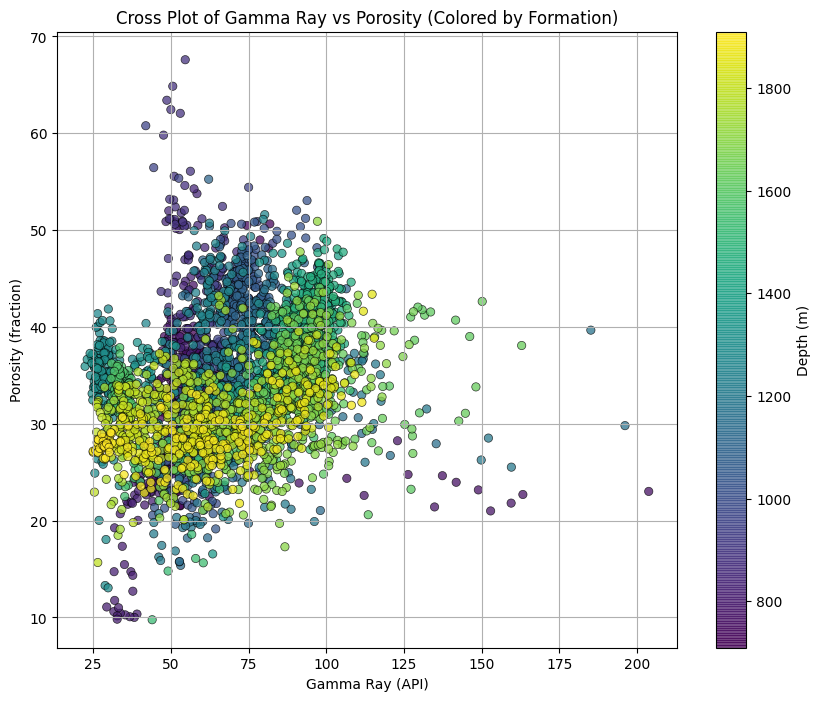

In [83]:
import matplotlib.pyplot as plt

# Plot the Vp vs.Vs cross-plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(log_GRGC, log_NPRL, c=depths, cmap='viridis', alpha=0.75, edgecolor='k', linewidth=0.5)

plt.xlabel('Gamma Ray (API)')
plt.ylabel('Porosity (fraction)')
plt.title('Cross Plot of Gamma Ray vs Porosity (Colored by Formation)')
cbar = plt.colorbar(sc)
cbar.set_label('Depth (m)')
plt.grid(True)

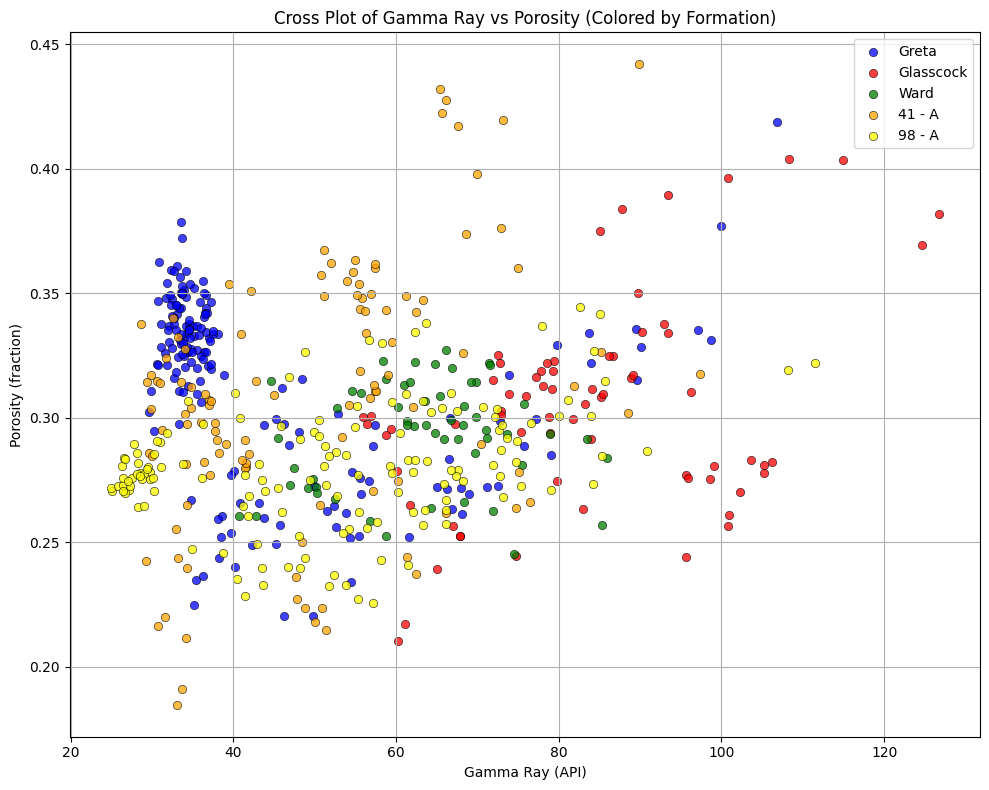

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Formation data
formations = [
    {"name": "Greta", "top": 5084.82 * 0.3048, "bottom": 5239.32 * 0.3048},
    {"name": "Glasscock", "top": 5465.68 * 0.3048, "bottom": 5521.79 * 0.3048},
    {"name": "Ward", "top": 5646.74 * 0.3048, "bottom": 5694.34 * 0.3048},
    {"name": "41 - A", "top": 5711.09 * 0.3048, "bottom": 5809.12 * 0.3048},
    {"name": "98 - A", "top": 6140.09 * 0.3048, "bottom": 6270.3 * 0.3048}
]

# Assign formation to each depth
def assign_formation(md):
    for formation in formations:
        if formation["top"] <= md < formation["bottom"]:
            return formation["name"]
    return "Unknown"

# Create the DataFrame with Depth, Gamma Ray, and Porosity
# Assuming `log_GRGC`, `log_NPRL`, and `depths` are arrays of data
df_sorted = pd.DataFrame({
    'Depth': depths,
    'Gamma_Ray': log_GRGC,  # Assuming log_GRGC is in API units
    'Porosity': log_NPRL / 100  # Convert porosity from percentage to fraction
})

# Apply the formation assignment based on depth
df_sorted['Formation'] = df_sorted['Depth'].apply(assign_formation)

# Define colors for formations
formation_colors = {
    "Greta": 'blue',
    "Glasscock": 'red',
    "Ward": 'green',
    "41 - A": 'orange',
    "98 - A": 'yellow'
}

# Create a plot for Gamma Ray vs. Porosity colored by formation
plt.figure(figsize=(10, 8))

# Plot: Gamma Ray vs. Porosity colored by formation
for formation in formation_colors.keys():
    subset = df_sorted[df_sorted['Formation'] == formation]
    plt.scatter(subset['Gamma_Ray'], subset['Porosity'], 
                color=formation_colors[formation], 
                label=formation, alpha=0.75, edgecolor='k', linewidth=0.5)

# Labeling and grid
plt.xlabel('Gamma Ray (API)')
plt.ylabel('Porosity (fraction)')
plt.title('Cross Plot of Gamma Ray vs Porosity (Colored by Formation)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


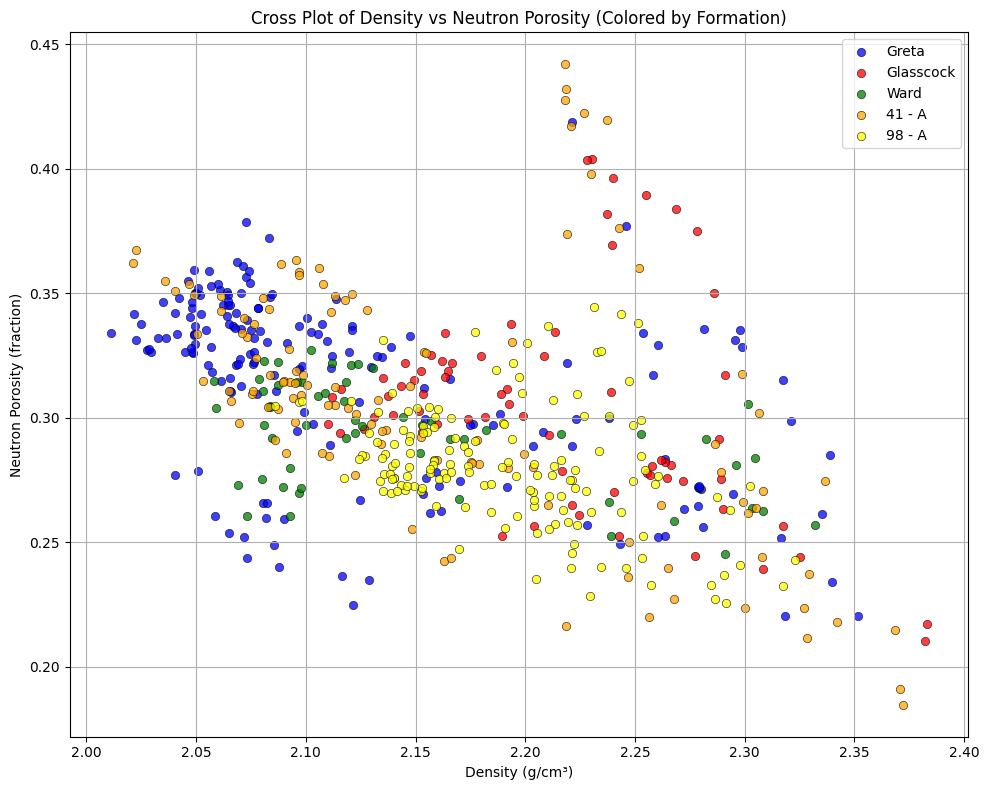

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Formation data
formations = [
    {"name": "Greta", "top": 5084.82 * 0.3048, "bottom": 5239.32 * 0.3048},
    {"name": "Glasscock", "top": 5465.68 * 0.3048, "bottom": 5521.79 * 0.3048},
    {"name": "Ward", "top": 5646.74 * 0.3048, "bottom": 5694.34 * 0.3048},
    {"name": "41 - A", "top": 5711.09 * 0.3048, "bottom": 5809.12 * 0.3048},
    {"name": "98 - A", "top": 6140.09 * 0.3048, "bottom": 6270.3 * 0.3048}
]

# Assign formation to each depth
def assign_formation(md):
    for formation in formations:
        if formation["top"] <= md < formation["bottom"]:
            return formation["name"]
    return "Unknown"

# Create the DataFrame with Depth, Density, and Porosity
# Assuming `log_DEN`, `log_NPRL`, and `depths` are arrays of data
df_sorted = pd.DataFrame({
    'Depth': depths,
    'Density': log_DEN,  # Density in g/cm³ or other units
    'Porosity': log_NPRL / 100  # Convert porosity from percentage to fraction
})

# Apply the formation assignment based on depth
df_sorted['Formation'] = df_sorted['Depth'].apply(assign_formation)

# Define colors for formations
formation_colors = {
    "Greta": 'blue',
    "Glasscock": 'red',
    "Ward": 'green',
    "41 - A": 'orange',
    "98 - A": 'yellow'
}

# Create a plot for Density vs. Neutron Porosity colored by formation
plt.figure(figsize=(10, 8))

# Plot: Density vs. Porosity colored by formation
for formation in formation_colors.keys():
    subset = df_sorted[df_sorted['Formation'] == formation]
    plt.scatter(subset['Density'], subset['Porosity'], 
                color=formation_colors[formation], 
                label=formation, alpha=0.75, edgecolor='k', linewidth=0.5)

# Labeling and grid
plt.xlabel('Density (g/cm³)')
plt.ylabel('Neutron Porosity (fraction)')
plt.title('Cross Plot of Density vs Neutron Porosity (Colored by Formation)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
